In [151]:
import pandas as pd 
import glob 

In [152]:
df=0
for file in glob.glob("emotibit/*.csv"): 
    df1 = pd.read_csv(file,index_col=0)
    if df is 0:
        df = df1
    else:
        df = pd.concat([df,df1],ignore_index=True)
df = df.dropna(subset=['label'])
df=df.drop(['EmotiBitTimestamp'],axis=1)
df = df[df.label != 'practice learning']
df = df[df.label != 'practice recognition']
df = df[df.label != 'practice recall name']

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/gh/m9jxzcm10xv0dvsmvffyk2rh0000gn/T/ipykernel_55038/285420230.py:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if df is 0:
/Users/saksham/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [153]:
df['label'].unique()

array(['baseline', 'game break', 'learning', 'recognition', 'recall name',
       'relax break'], dtype=object)

In [154]:
df.loc[df['label'] == 'baseline', 'label'] ='negative'
df.loc[df['label']=='game break','label']='negative'
df.loc[df['label']=='relax break','label']='negative'
df.loc[df['label']=='recall name','label']='recall'
df.loc[(df['label']=='recognition')&(df['remembered']=='Yes'),'label']='recognition familiar'
df.loc[(df['label']=='recognition')&(df['remembered']=='No'),'label']='recognition new'
df = df[df.label != 'recognition']

In [155]:
df['label'].unique()

array(['negative', 'learning', 'recognition familiar', 'recognition new',
       'recall'], dtype=object)

In [156]:
df.columns

Index(['T1', 'EL', 'PI', 'AY', 'MZ', 'AX', 'AZ', 'MY', 'MX', 'TH', 'GZ', 'PR',
       'GY', 'PG', 'GX', 'EA', 'estimated_pupil_time', 'label', 'is_question',
       'is_verbal', 'remembered', 'resp_confidence', 'image', 'SF', 'SR',
       'SA'],
      dtype='object')

In [157]:
df.groupby('label').mean()


,T1,EL,PI,AY,MZ,AX,AZ,MY,MX,TH,GZ,PR,GY,PG,GX,EA,estimated_pupil_time,SF,SR,SA
label,,,,,,,,,,,,,,,,,,,,
learning,37.877707,-10962.782542,178718.203475,0.205753,-0.357003,-0.688975,2.519911,-45.169097,37.282440,36.287217,0.419223,134080.928600,0.893891,10986.559884,0.809730,0.550905,488820.350376,22.516785,0.213065,0.002996
negative,37.292423,-9139.828863,177747.745727,0.200778,0.128088,-0.679470,0.453632,-43.867526,37.211305,35.754369,0.416786,133183.960427,0.933989,10865.858041,0.817402,1.049779,478137.520534,26.338885,0.229951,1.793076
recall,38.074018,-12518.993902,178345.686352,0.207803,0.079958,-0.705218,0.436397,-45.670126,37.450419,36.482194,0.420364,135310.587741,0.879054,10753.634261,0.807951,31.673285,486986.622544,16.482025,0.276431,18.871386
recognition familiar,38.031947,-11562.783883,179368.746277,0.207631,-0.142084,-0.692746,0.433831,-45.595545,36.877452,36.439393,0.429637,135642.071218,0.849506,11130.354121,0.814011,0.484572,487163.867149,16.819265,0.197970,0.003992
recognition new,38.014274,-11730.064491,179214.191960,0.209917,-1.115453,-0.696525,0.406524,-46.257722,37.019787,36.435150,0.428873,135388.702570,0.886432,11070.583445,0.811318,0.597037,501801.209960,16.930081,0.198671,0.002057


In [158]:
df.groupby('label').var()

,T1,EL,PI,AY,MZ,AX,AZ,MY,MX,TH,GZ,PR,GY,PG,GX,EA,estimated_pupil_time,SF,SR,SA
label,,,,,,,,,,,,,,,,,,,,
learning,1.161069,7.526180e+07,1.781523e+08,0.009961,214.780181,0.081395,23036.837994,315.219752,72.107614,1.229543,0.100522,4.360270e+08,0.723338,9.106834e+06,0.133724,0.480283,8.580889e+10,689.153635,0.040580,0.000321
negative,2.044966,1.105134e+08,1.852360e+08,0.009097,240.548425,1.221911,0.172572,311.973943,72.064528,1.883780,2.304292,4.378261e+08,12.612761,8.807967e+06,3.999385,542.112376,8.703327e+10,729.756992,0.039625,17852.635224
recall,1.545990,4.922868e+07,1.862168e+08,0.009492,207.486584,0.063105,0.151422,262.628571,72.131177,1.433562,0.189561,4.016923e+08,3.273176,7.953278e+06,0.348416,217993.776450,8.336799e+10,192.359664,0.081516,188100.681557
recognition familiar,1.276897,5.233750e+07,1.952461e+08,0.007759,235.237854,0.074007,0.162413,271.844377,59.617165,1.285441,0.214526,3.782279e+08,6.605861,8.606232e+06,0.099217,0.317896,8.330542e+10,350.774476,0.041176,0.000570
recognition new,1.331894,6.528015e+07,1.929438e+08,0.008107,265.564097,0.071916,0.180516,273.884017,58.127826,1.144813,0.034632,3.822747e+08,0.177540,8.408501e+06,0.047219,0.473571,8.004223e+10,432.643769,0.063524,0.000151


## Plotting mean and variance with 5 classes

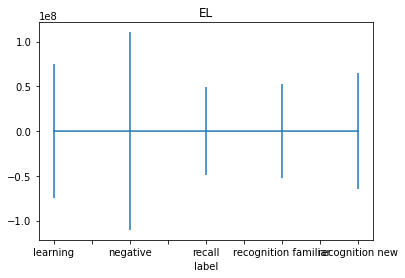

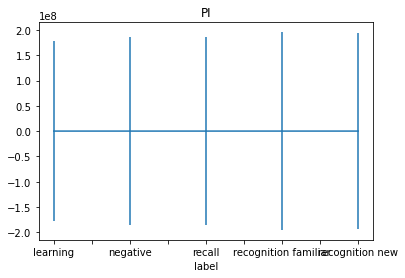

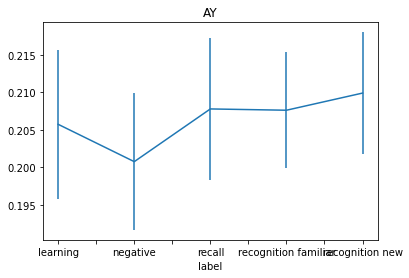

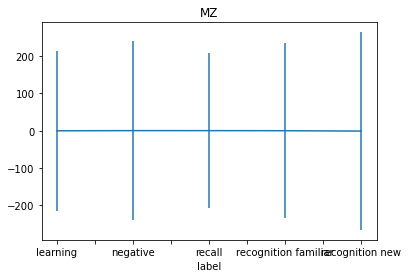

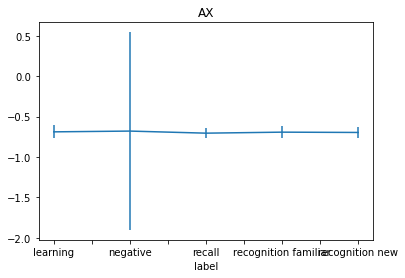

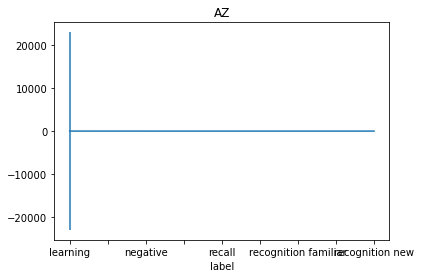

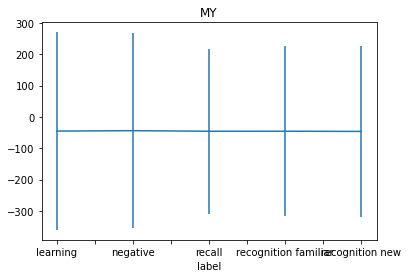

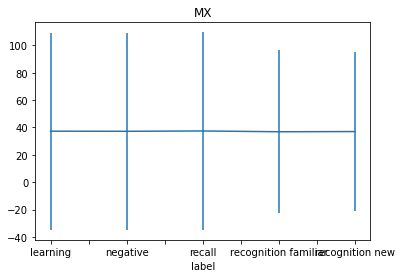

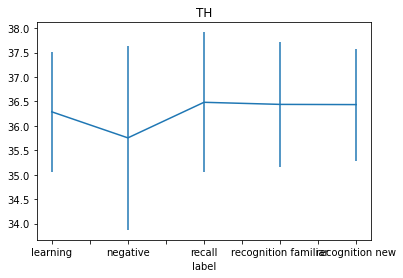

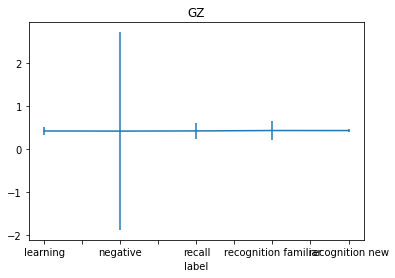

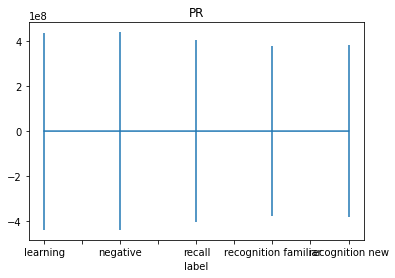

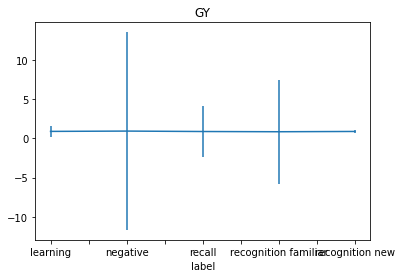

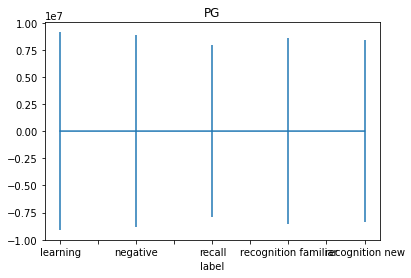

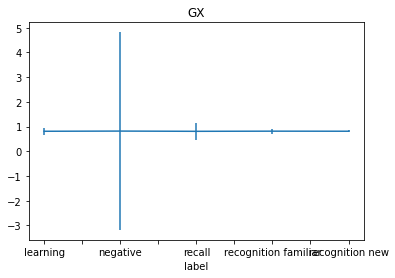

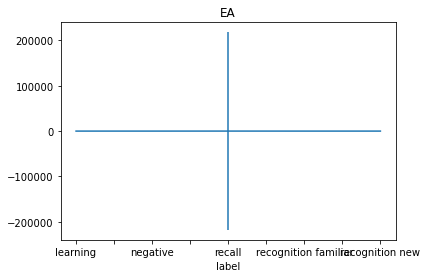

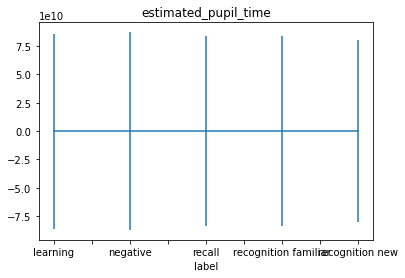

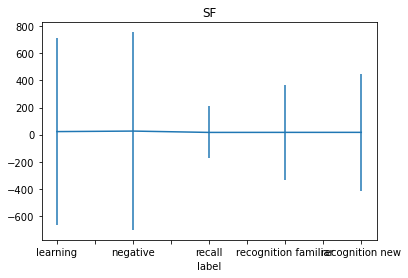

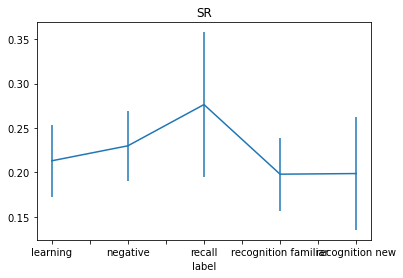

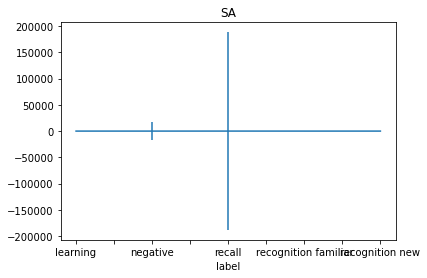

In [159]:
#Plot graph for each feature showing mean and variance for each label
import matplotlib.pyplot as plt

#Plot box plot of each feature for each label
for col in df.columns[1:]:
    if col != 'label' and col!='is_question' and col!='is_verbal' and col != 'remembered' and col!='resp_confidence' and col!='image':
        plt.figure()
        #Box plot with mean and variance of all the different labels
        df.groupby('label')[col].mean().plot(kind='line',yerr=df.groupby('label')[col].var())
        plt.title(col)
        plt.show()
        plt.close()

In [160]:
df = df[df.label != 'negative']

## Plotting mean and variance without 'negative' class

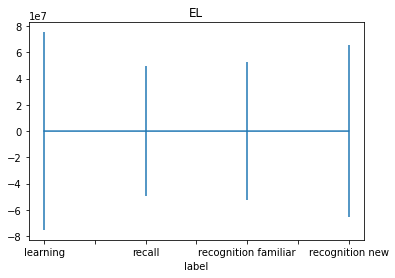

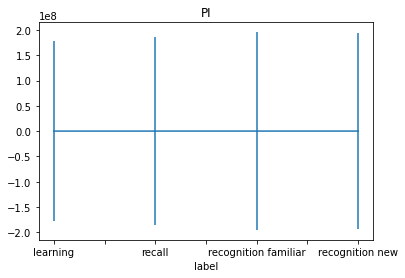

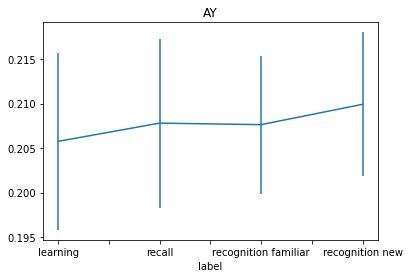

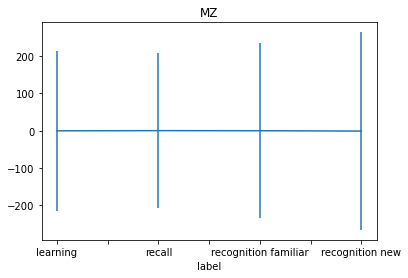

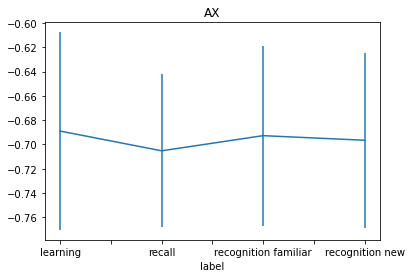

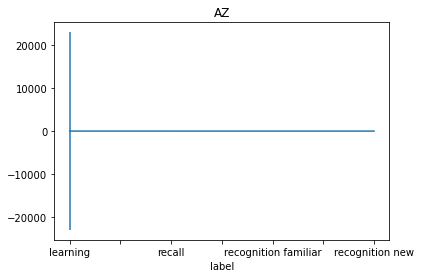

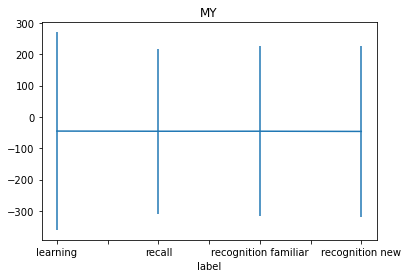

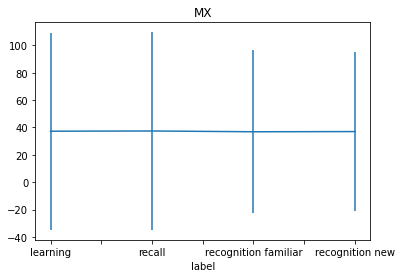

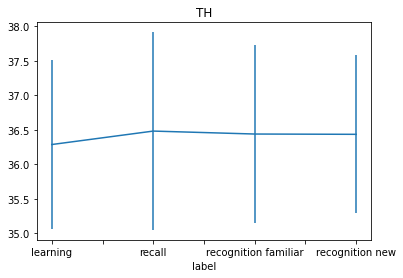

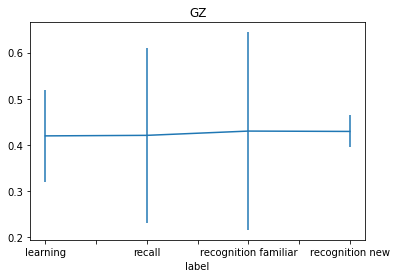

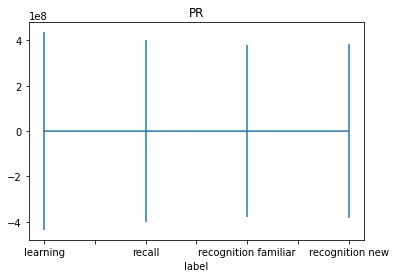

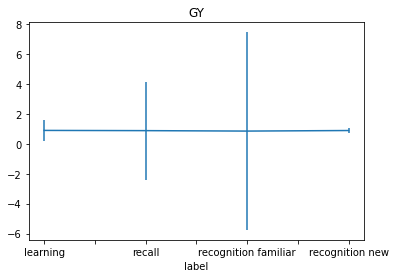

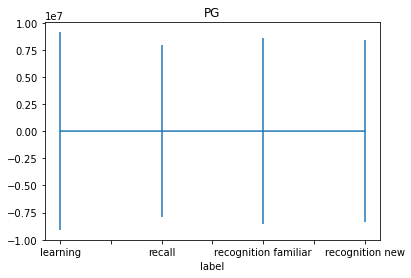

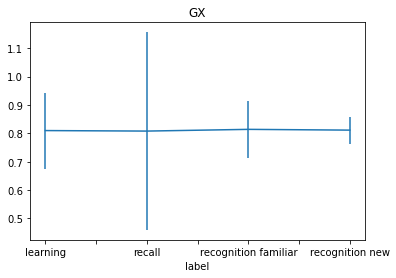

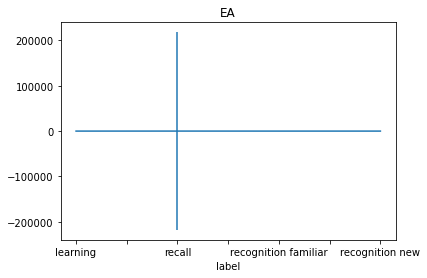

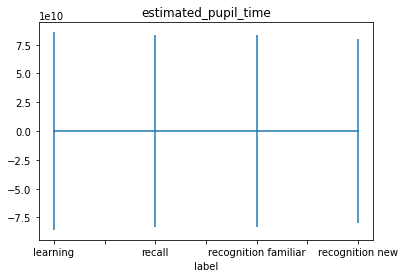

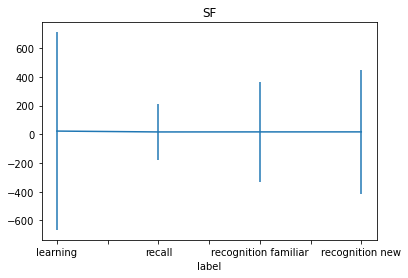

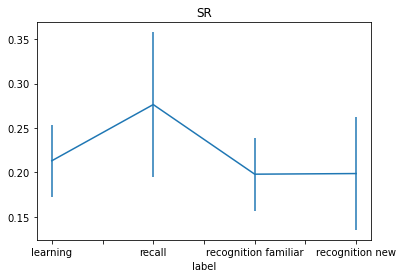

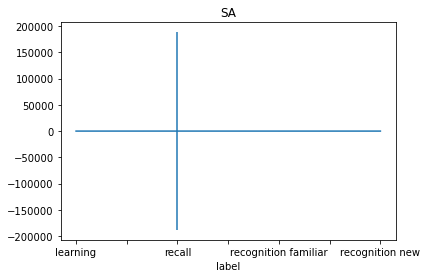

In [161]:
for col in df.columns[1:]:
    if col != 'label' and col!='is_question' and col!='is_verbal' and col != 'remembered' and col!='resp_confidence' and col!='image':
        plt.figure()
        #Box plot with mean and variance of all the different labels
        df.groupby('label')[col].mean().plot(kind='line',yerr=df.groupby('label')[col].var())
        plt.title(col)
        plt.show()
        plt.close()